In [35]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [36]:
# Paths and parameters
best_cars_model_path = 'best_cars_model.h5'
train_cars_dataset_path = 'data/cars_train/train'
test_cars_dataset_path = 'data/cars_test'
mean = np.array([0.4708, 0.4602, 0.4550])
std = np.array([0.2593, 0.2584, 0.2634])

In [37]:
# Load the trained model
model = load_model(best_cars_model_path)

In [38]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_cars_dataset_path, class_mode='categorical')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)
test_datagen.mean = mean
test_datagen.std = std

Found 6442 images belonging to 196 classes.


In [39]:
# Get the class indices
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

print("Class indices:", class_indices)
print("Class labels:", class_labels)

Class indices: {'AM General Hummer SUV 2000': 0, 'Acura Integra Type R 2001': 1, 'Acura RL Sedan 2012': 2, 'Acura TL Sedan 2012': 3, 'Acura TL Type-S 2008': 4, 'Acura TSX Sedan 2012': 5, 'Acura ZDX Hatchback 2012': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Series Wagon 2012': 28, 'BMW 6 Series Convertible 2007': 29, 'BMW ActiveHybrid 5 Sedan 2012': 30, 'BMW M3 Coupe 2012': 

In [40]:
# List all image files in the test directory
image_files = [f for f in os.listdir(test_cars_dataset_path) if os.path.isfile(os.path.join(test_cars_dataset_path, f))]
print(image_files)

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg'

In [41]:
# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    return img_array

1/1 [==============================] - 0s 31ms/step


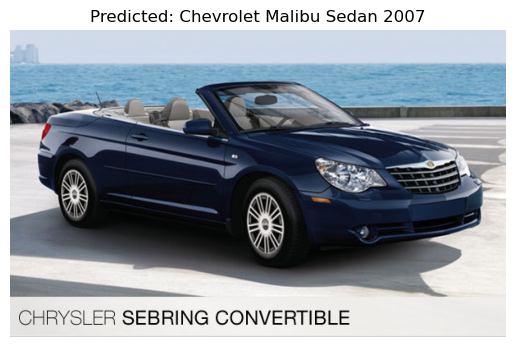

In [43]:
# Select a random image from the test directory
random_image_file = random.choice(image_files)
random_image_path = os.path.join(test_cars_dataset_path, random_image_file)

# Load and preprocess the random image
img_array = load_and_preprocess_image(random_image_path)

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Map the predicted index to the class label
predicted_class_label = class_labels[predicted_class_index]

# Display the image and prediction
img = image.load_img(random_image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()